## **Writing code structure with Pytorch**

Epoch [10/100] Loss: 1.6027
Epoch [20/100] Loss: 0.7686
Epoch [30/100] Loss: 0.6595
Epoch [40/100] Loss: 0.5752
Epoch [50/100] Loss: 0.5062
Epoch [60/100] Loss: 0.4526
Epoch [70/100] Loss: 0.4214
Epoch [80/100] Loss: 0.3979
Epoch [90/100] Loss: 0.3822
Epoch [100/100] Loss: 0.3718

Test MSE Loss: 0.3824
Test R2 Score: 0.7082


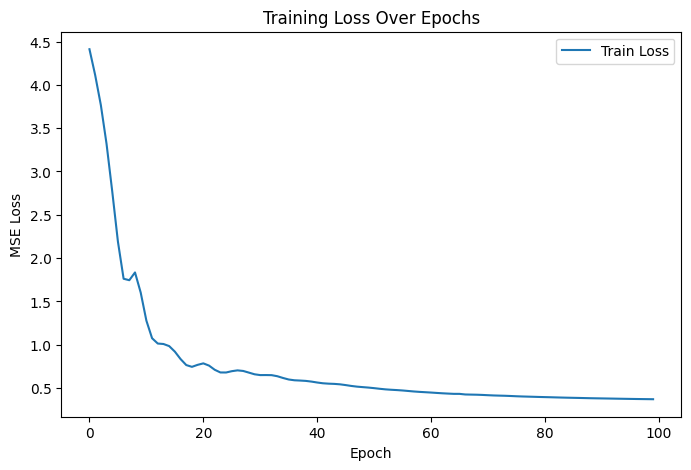

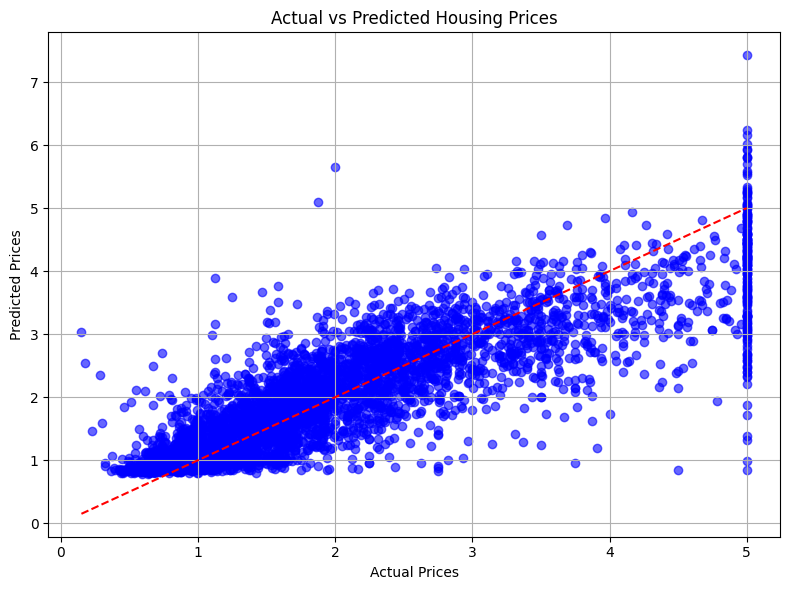


Sample Predictions vs Actual Values:
Predicted: 0.84, Actual: 0.48
Predicted: 1.84, Actual: 0.46
Predicted: 3.77, Actual: 5.00
Predicted: 2.74, Actual: 2.19
Predicted: 3.01, Actual: 2.78


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. Load and preprocess California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

# 2. Define your model class
class Model(nn.Module):
    def __init__(self, Input=8, h1=64, h2=32, h3=16, h4=8, Output=1):
        super().__init__()
        self.fc1 = nn.Linear(Input, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, h4)
        self.fc5 = nn.Linear(h4, Output)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Instantiate model, loss, optimizer
model = Model()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 3. Training loop
epochs = 100
train_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] Loss: {loss.item():.4f}")

# 4. Evaluate model on test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test).item()
    r2 = r2_score(y_test.numpy(), y_pred.numpy())

print(f"\nTest MSE Loss: {test_loss:.4f}")
print(f"Test R2 Score: {r2:.4f}")

# 5. Plot training loss
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# 6. Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test.numpy(), y_pred.numpy(), alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Print sample predictions vs actual values
print("\nSample Predictions vs Actual Values:")
for pred, actual in zip(y_pred[:5], y_test[:5]):
    print(f"Predicted: {pred.item():.2f}, Actual: {actual.item():.2f}")

## **Writing same code structure using Reuseability** 

Epoch [10/100] Loss: 2.9241
Epoch [20/100] Loss: 0.8287
Epoch [30/100] Loss: 0.7373
Epoch [40/100] Loss: 0.6225
Epoch [50/100] Loss: 0.5434
Epoch [60/100] Loss: 0.4945
Epoch [70/100] Loss: 0.4514
Epoch [80/100] Loss: 0.4252
Epoch [90/100] Loss: 0.4076
Epoch [100/100] Loss: 0.3940

Test MSE Loss: 0.4055
Test R2 Score: 0.6906


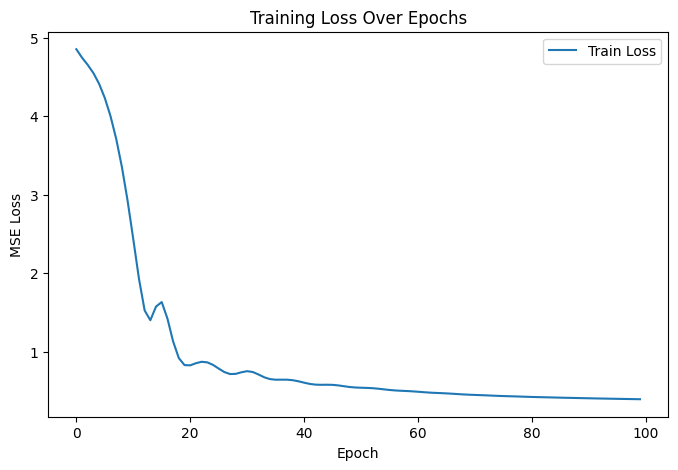

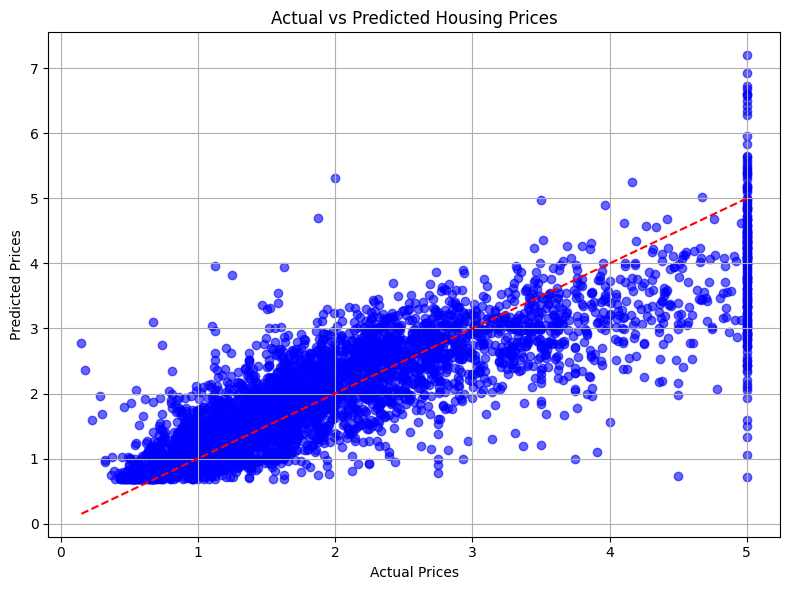


Sample Predictions vs Actual Values:
Predicted: 0.68, Actual: 0.48
Predicted: 1.80, Actual: 0.46
Predicted: 3.44, Actual: 5.00
Predicted: 2.79, Actual: 2.19
Predicted: 2.85, Actual: 2.78


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. Define the model class
class Model(nn.Module):
    def __init__(self, Input=8, h1=64, h2=32, h3=16, h4=8, Output=1):
        super().__init__()
        self.fc1 = nn.Linear(Input, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, h4)
        self.fc5 = nn.Linear(h4, Output)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x


# 2. Data loading and preprocessing
def load_data(test_size=0.2, random_state=42):
    data = fetch_california_housing()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Convert to torch tensors
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    return X_train, X_test, y_train, y_test


# 3. Training function
def train_model(model, criterion, optimizer, X_train, y_train, epochs=100):
    train_losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{epochs}] Loss: {loss.item():.4f}")
    return train_losses


# 4. Evaluation function
def evaluate_model(model, criterion, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        test_loss = criterion(y_pred, y_test).item()
        r2 = r2_score(y_test.numpy(), y_pred.numpy())
    return test_loss, r2, y_pred


# 5. Plotting functions
def plot_training_loss(losses):
    plt.figure(figsize=(8, 5))
    plt.plot(losses, label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.show()


def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test.numpy(), y_pred.numpy(), alpha=0.6, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Housing Prices')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 6. Main function to orchestrate everything
def main():
    # Load data
    X_train, X_test, y_train, y_test = load_data()

    # Instantiate model, loss function, optimizer
    model = Model()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Train model
    train_losses = train_model(model, criterion, optimizer, X_train, y_train, epochs=100)

    # Evaluate model
    test_loss, r2, y_pred = evaluate_model(model, criterion, X_test, y_test)
    print(f"\nTest MSE Loss: {test_loss:.4f}")
    print(f"Test R2 Score: {r2:.4f}")

    # Plot results
    plot_training_loss(train_losses)
    plot_actual_vs_predicted(y_test, y_pred)

    # Print sample predictions
    print("\nSample Predictions vs Actual Values:")
    for pred, actual in zip(y_pred[:5], y_test[:5]):
        print(f"Predicted: {pred.item():.2f}, Actual: {actual.item():.2f}")


if __name__ == "__main__":
    main()
